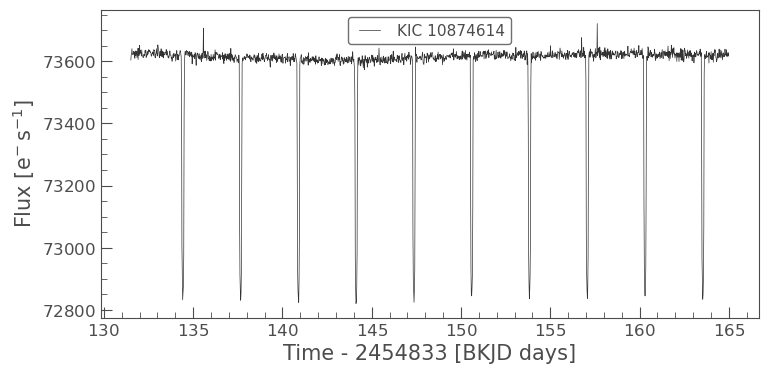

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.timeseries import LombScargle
import lightkurve as lk
import os

klc = lk.search_lightcurve("Kepler-6", author="Kepler", cadence="long",quarter=1).download().remove_nans() #Search database for specified target
#klc=lk.read('kplr010418224-2009259160929_llc.fits') #Read in files if required
klc.plot() #Plotting lightkurve
plt.show()

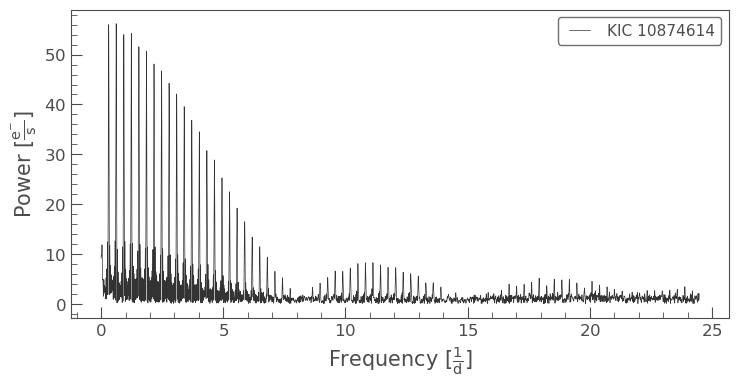

In [3]:
pg = klc.to_periodogram(oversample_factor=30) #Plotting periodogram
pg.plot()
plt.show()

In [4]:
#pg.plot(view='period',scale='log') #Log scale if required
#plt.show()

In [5]:
pmax=pg.period_at_max_power #Period calculated from frequency at max power
print(pmax)

1.619585192083304 d


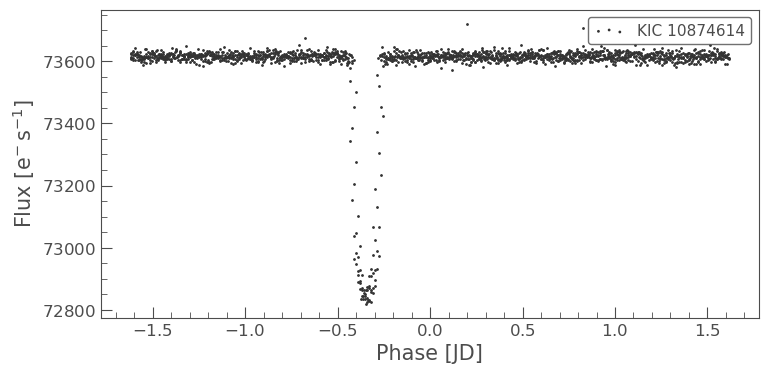

3.239170384166608 d


In [7]:
correction = 2 #correction made to calculated period depending on pase plot
klc.fold(period=correction*pmax).scatter()
plt.show()
true_period = correction*pmax
print(true_period)